# Matplotlib Tutorial


### Lesson 1 - First Plots

In [1]:
import csv

In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

In [4]:
from collections import Counter

In [5]:
import numpy as np

In [6]:
%matplotlib notebook

In [7]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<IPython.core.display.Javascript object>


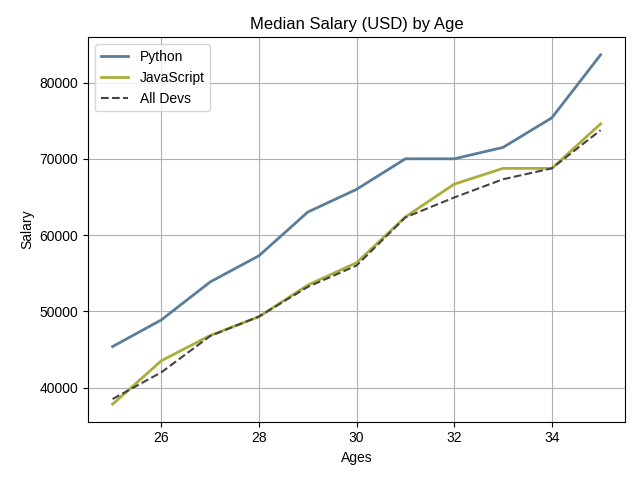

In [8]:
# plt.style.use('seaborn-talk')
# plt.xkcd()

ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]
plt.plot(ages_x, py_dev_y, color='#5a7d9a', linewidth=2, label='Python')


js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]
plt.plot(ages_x, js_dev_y, color='#adad3b', linewidth=2, label='JavaScript')


dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]
plt.plot(ages_x, dev_y, color='#444444', linestyle='--', label='All Devs')


plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Salary')

plt.legend()

plt.grid()

plt.tight_layout() #for padding issues

plt.savefig('plot.png')

plt.show()

### Lesson 2 - Bar charts and Analyzing Data from CSVs

<IPython.core.display.Javascript object>


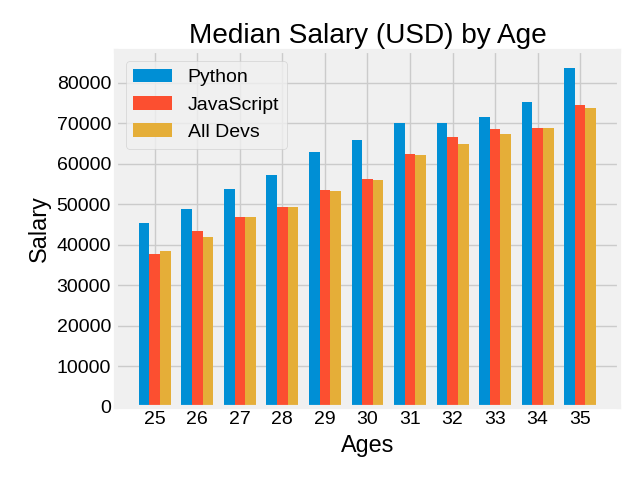

In [9]:
plt.figure()
plt.style.use('fivethirtyeight')

x_indexes = np.arange(len(ages_x))
width = 0.25

plt.bar(x_indexes - width, py_dev_y, width=width, label='Python')
plt.bar(x_indexes, js_dev_y, width=width, label="JavaScript")
plt.bar(x_indexes + width, dev_y, width=width, label='All Devs')

plt.xticks(ticks=x_indexes, labels=ages_x)


plt.title('Median Salary (USD) by Age')
plt.ylabel('Salary')
plt.xlabel('Ages')
plt.legend()

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


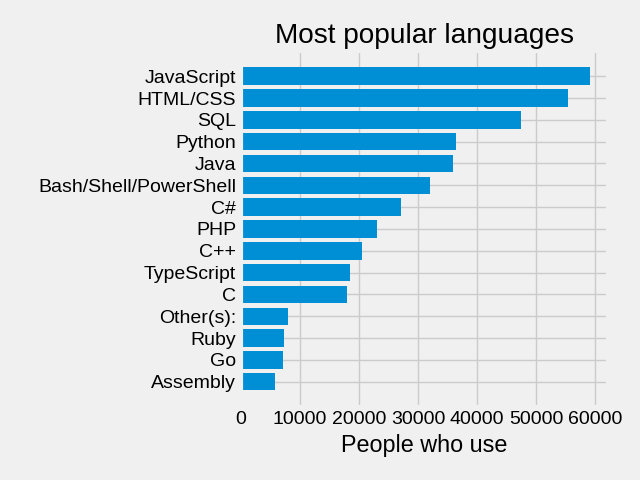

In [10]:
plt.figure()

# Reading the csv file using built-in csv module

# with open('data.csv') as csv_file:
#     csv_reader = csv.DictReader(csv_file)
    
#     language_counter = Counter()
    
#     for row in csv_reader:
#         language_counter.update(row['LanguagesWorkedWith'].split(';'))

# Reading the csv file using pandas

data = pd.read_csv('data.csv')
ids = data["Responder_id"]
lang_responses = data['LanguagesWorkedWith']

language_counter = Counter()

for response in lang_responses:
    language_counter.update(response.split(';'))


languages = []
popularity = []

for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])
    
languages.reverse()
popularity.reverse()
    
plt.barh(languages, popularity)

plt.title('Most popular languages')
plt.xlabel('People who use')

plt.tight_layout()
plt.show()
    

### Lesson 3 - Pie Charts

<IPython.core.display.Javascript object>


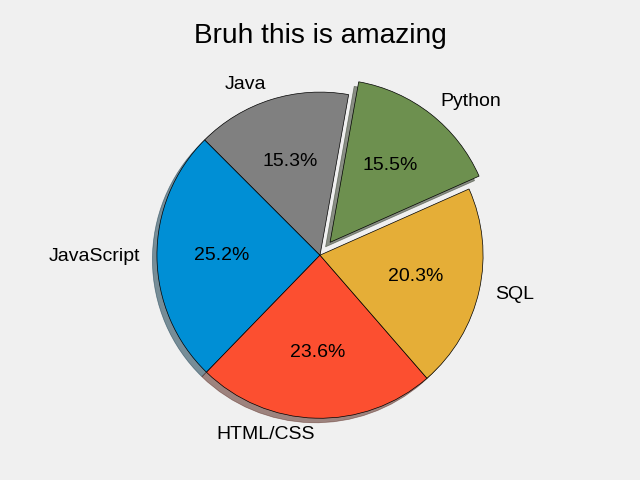

In [11]:
plt.figure()

plt.style.use('fivethirtyeight')

slices = [59219, 55466, 47544, 36443, 35917]
labels = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java']
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f', 'gray']
explode = [0, 0, 0, 0.1, 0]

plt.pie(slices, labels=labels, colors=colors, explode=explode, startangle=135,
        shadow=True, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title('Bruh this is amazing')
plt.tight_layout()
plt.show()

### Lesson 4 - Stack Plots

<IPython.core.display.Javascript object>


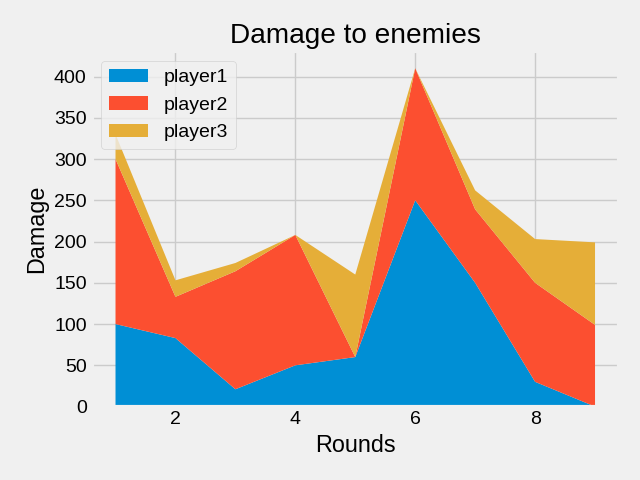

In [12]:
plt.figure()

plt.style.use('fivethirtyeight')

rounds = [1, 2, 3, 4, 5, 6, 7, 8, 9]

player1 = [100, 83, 21, 50, 60, 250, 150, 30, 0]
player2 = [200, 50, 143, 158, 0, 160, 89, 120, 99]
player3 = [30, 20, 10, 0, 100, 0, 23, 53, 100]

labels = ['player1', 'player2', 'player3']

plt.stackplot(rounds, player1, player2, player3, labels=labels)

plt.legend(loc='upper left')

plt.xlabel('Rounds')
plt.ylabel('Damage')

plt.title('Damage to enemies')
plt.tight_layout()

plt.show()

### Lesson 5 - Filling Area on Line Plots

<IPython.core.display.Javascript object>


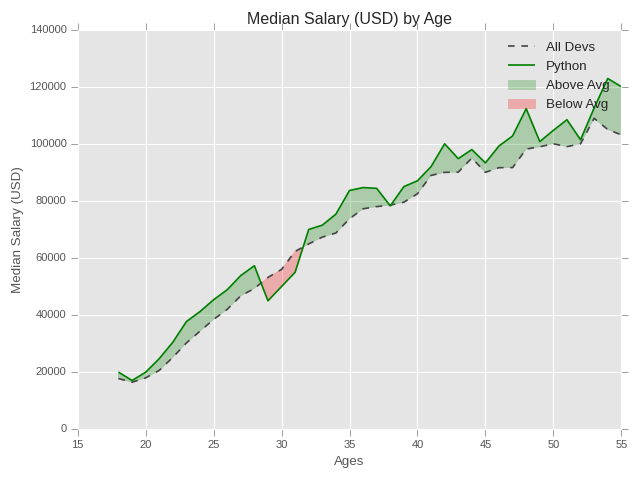

In [33]:
plt.figure()
plt.style.use('ggplot')

data = pd.read_csv('salaries.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

plt.plot(ages, dev_salaries, color='#444444',
         linestyle='--', linewidth=1.5, label='All Devs')

plt.plot(ages, py_salaries, color='green', linewidth=1.5, label='Python')

overall_median = 57287


plt.fill_between(ages, py_salaries, dev_salaries,
                 where=(py_salaries > dev_salaries),
                 interpolate=True, color='green', alpha=0.25, label='Above Avg')

plt.fill_between(ages, py_salaries, dev_salaries,
                 where=(py_salaries <= dev_salaries),
                 interpolate=True, color='red', alpha=0.25, label='Below Avg')

plt.legend()
plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')

plt.tight_layout()

plt.show()